In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',None)

In [325]:
df = pd.read_csv('winequality-red.csv')

In [326]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


First and foremost will check is there any Nan values present in the Dataset.

In [327]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no Nan values present in Dataset.

In [328]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

As there are many labels, we will divide it into 3 labels. 

In [329]:
df['quality'] = np.where(df['quality']<=5,0,1)

we have converted quality variable into two labels as 0-poor,1-good

In [331]:
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

As we can see here,Dataset is balanced.

Here,All the variables(features) are of Numerical type.

will analyse it one by one. 

In [332]:
features = [feature for feature in df.columns if feature!='quality']

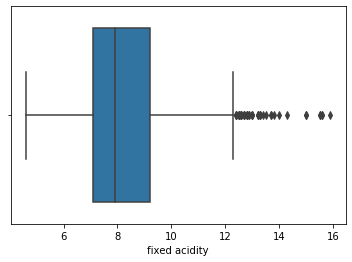

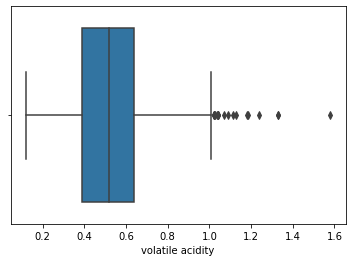

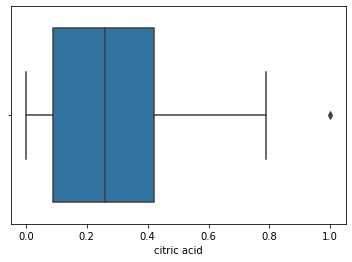

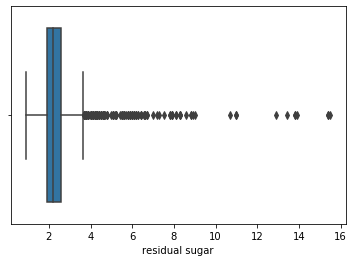

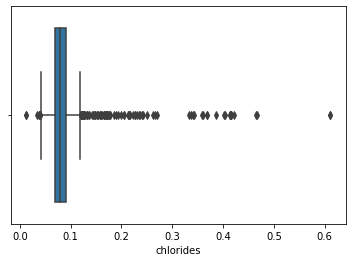

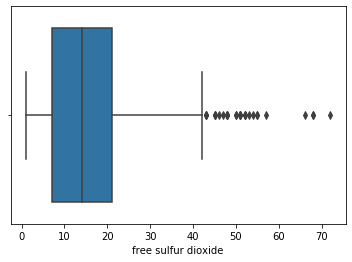

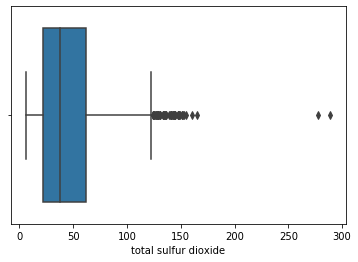

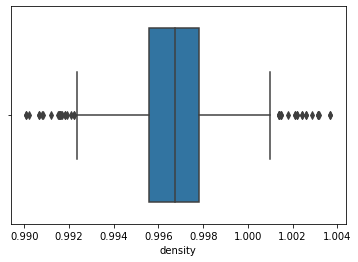

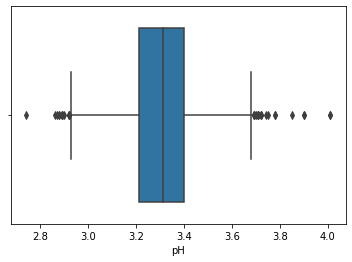

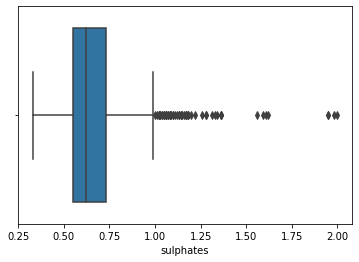

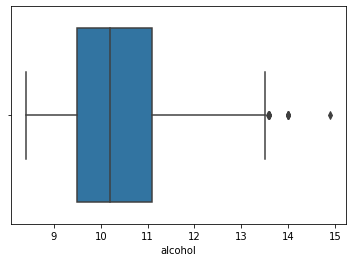

In [333]:
for feature in features:
    sns.boxplot(x=feature,data=df)
    plt.xlabel(feature)
    plt.show()

As we can see there are number of Outliers present in each feature.
so,here will use top coding and bottom coding technique to fix this.

In [334]:
dic = {}
for feature in features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

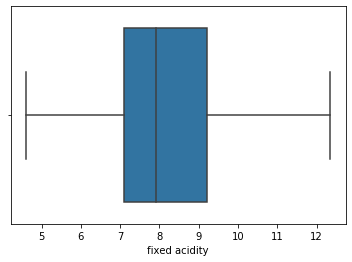

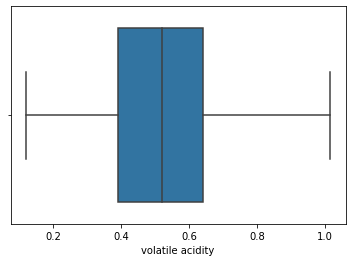

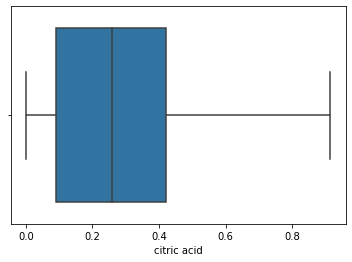

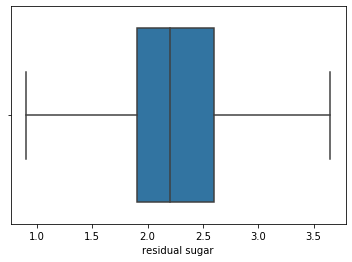

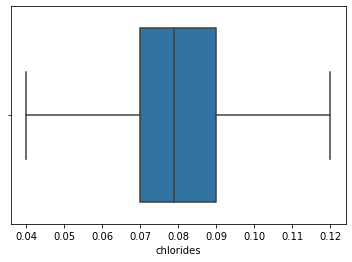

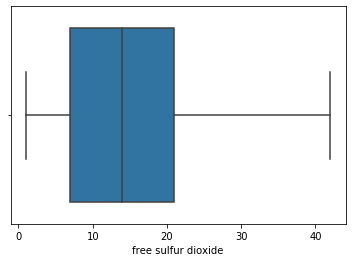

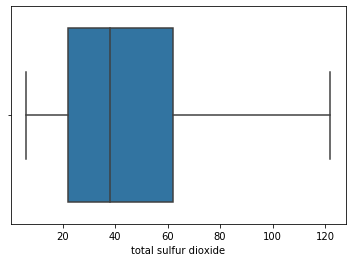

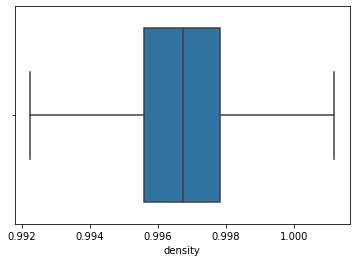

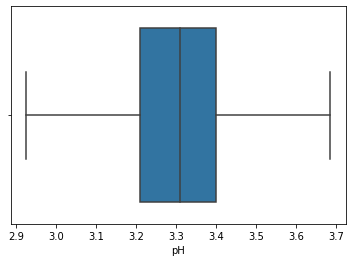

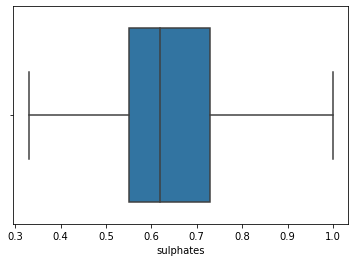

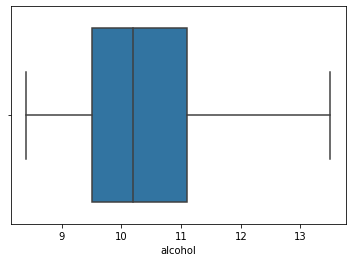

In [335]:
for feature in features:
    sns.boxplot(x=feature,data=df)
    plt.xlabel(feature)
    plt.show()

Now we split our dataset into train and test dataset.

In [336]:
from sklearn.model_selection import train_test_split

In [539]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.2)

In [540]:
y_train.value_counts()

1    684
0    595
Name: quality, dtype: int64

As, we can see, we have fixed it

In [541]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report

But Outliers do not impact much on tree based models.

In [542]:
from sklearn.linear_model import LogisticRegression

In [543]:
model = LogisticRegression(max_iter=1000)

In [544]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [545]:
y_predict = model.predict(X_test)

In [546]:
y_predict_proba_train = model.predict_proba(X_train)

In [547]:
y_predict_proba_test = model.predict_proba(X_test)

In [548]:
roc_auc_score(y_train,y_predict_proba_train[:,1])

0.8252272838960145

In [549]:
roc_auc_score(y_test,y_predict_proba_test[:,1])

0.8253856116802072

In [550]:
confusion_matrix(y_test,y_predict)

array([[106,  43],
       [ 37, 134]], dtype=int64)

In [551]:
accuracy_score(y_test,y_predict)

0.75

In [552]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       149
           1       0.76      0.78      0.77       171

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [553]:
from sklearn.ensemble import RandomForestClassifier

In [554]:
model = RandomForestClassifier(n_estimators=1000)

In [555]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [556]:
y_predict = model.predict(X_test)

In [557]:
y_predict_proba_train = model.predict_proba(X_train)

In [558]:
y_predict_proba_test = model.predict_proba(X_test)

In [559]:
roc_auc_score(y_train,y_predict_proba_train[:,1])

0.9999999999999999

In [560]:
roc_auc_score(y_test,y_predict_proba_test[:,1])

0.9181482789748421

In [561]:
confusion_matrix(y_test,y_predict)

array([[122,  27],
       [ 26, 145]], dtype=int64)

In [562]:
accuracy_score(y_test,y_predict)

0.834375

In [563]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       149
           1       0.84      0.85      0.85       171

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320

